# **Covid19 Project**

**Problem Statement:**

Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.

**Dataset:**

CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India. Download Link

**Guidelines:**

● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combineing these technologies

# **Import Dataset & install package & import packages**

In [ ]:
from google.colab import files
upload = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [ ]:
!pip install prophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet

In [ ]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [ ]:
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()


Dataset Head:
   Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------     

**Summary of Results Based on Your COVID-19 Dataset:**

**Key Characteristics of the Dataset:**

**Structure:**

Total records: 49,068.
Total columns: 10.
Includes data on Province/State, Country/Region, geographic coordinates (Lat, Long), and temporal information (Date).

Outcome metrics: Confirmed, Deaths, Recovered, and Active cases.

**Null Values:**

Province/State has significant missing data, with only 14,664 non-null values.

**Time Frame:**

The dataset begins on 2020-01-22, covering the start of the pandemic.
Geographic Coverage:

Records span multiple countries and regions worldwide, categorized by WHO Region.

**Observations from Initial Data:**

**Case Counts:**

All metrics (Confirmed, Deaths, Recovered, Active) are initialized to 0 on 2020-01-22.

**Regions:**

Includes records grouped by WHO regions, e.g., Eastern Mediterranean, Europe, Africa, etc.

**Potential Insights:**

Temporal trends can show how COVID-19 cases progressed globally or by specific regions.

Recovery rates, active cases, and mortality rates can highlight the pandemic's impact and response effectiveness.

**Next Steps for Analysis**:

**Missing Data Handling:**

Decide how to handle missing values in Province/State (e.g., fill with "Unknown" or drop if not critical).

**Time-Series Analysis:**

Analyze Confirmed, Deaths, and Recovered over time to identify trends and peaks.

**Geographical Insights:**

Map COVID-19 metrics by Lat and Long for spatial visualization.
Group data by WHO Region or Country/Region for regional comparisons.

**Key Metrics:**

Calculate metrics such as mortality rate (Deaths/Confirmed) and recovery rate (Recovered/Confirmed).

Identify countries with the highest and lowest impact.

**Visualization:**

Generate graphs like line plots for trends, bar charts for regional comparisons, and heatmaps for geographical analysis.

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])


aggregated_data = df.groupby('Date').sum().reset_index()


data_filtered = aggregated_data[['Date', 'Confirmed', 'Deaths', 'Recovered']]

In [ ]:

fig = px.line(data_filtered, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              labels={'value': 'Number of Cases', 'variable': 'Category'},
              title='Global Trends of COVID-19 Cases')
fig.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp65et5v13/uj4ols2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp65et5v13/qx4y4dma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83074', 'data', 'file=/tmp/tmp65et5v13/uj4ols2h.json', 'init=/tmp/tmp65et5v13/qx4y4dma.json', 'output', 'file=/tmp/tmp65et5v13/prophet_modeli0i3k2oq/prophet_model-20241218154021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:40:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:40:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


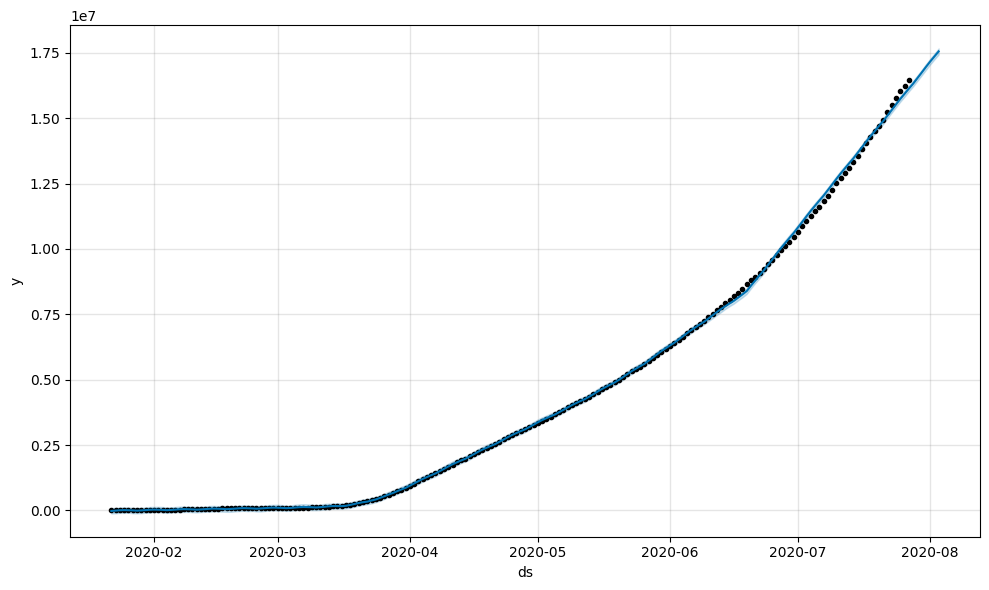

In [ ]:
confirmed_data = data_filtered[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})


model = Prophet()
model.fit(confirmed_data)


future = model.make_future_dataframe(periods=7)

forecast = model.predict(future)


fig_forecast = model.plot(forecast)
fig_forecast.show()

In [ ]:
forecast_visual = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_visual = forecast_visual.merge(confirmed_data, on='ds', how='left')

fig_combined = px.line(forecast_visual, x='ds',
                       y=['y', 'yhat'],
                       labels={'value': 'Number of Cases', 'ds': 'Date', 'variable': 'Category'},
                       title='Actual vs Predicted COVID-19 Cases')
fig_combined.show()


forecast_visual.to_csv('covid_forecast.csv', index=False)
print("Forecasted data saved to 'covid_forecast.csv'")


Forecasted data saved to 'covid_forecast.csv'
